In [7]:
import os
import pandas as pd

# Check if you're running on Kaggle
IS_KAGGLE = os.path.exists("/kaggle/input")

if IS_KAGGLE:
    dataset_path = "/kaggle/input/cafe-sales-dirty-data-for-cleaning-training/dirty_cafe_sales.csv"
else:
    dataset_path = "datasets/dirty_cafe_sales.csv"

# Load the dataset
df = pd.read_csv(dataset_path)
display(df.head())

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec

# Set up visualization style
plt.style.use('default')
sns.set_palette("husl")

# Explore the dataset structure
print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print("\nData Types:")
print(df.dtypes)
print("\nFirst few rows:")
display(df.head())

# Check for missing values and data quality issues
print("\nMissing Values:")
print(df.isnull().sum())
print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")
    if df[col].nunique() < 20:
        print(f"  Values: {df[col].unique()}")
    print()

Dataset Info:
Shape: (10000, 8)

Columns: ['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent', 'Payment Method', 'Location', 'Transaction Date']

Data Types:
Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object

First few rows:


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11



Missing Values:
Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

Unique values in each column:
Transaction ID: 10000 unique values

Item: 10 unique values
  Values: ['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'UNKNOWN' 'Sandwich' nan
 'ERROR' 'Juice' 'Tea']

Quantity: 7 unique values
  Values: ['2' '4' '5' '3' '1' 'ERROR' 'UNKNOWN' nan]

Price Per Unit: 8 unique values
  Values: ['2.0' '3.0' '1.0' '5.0' '4.0' '1.5' nan 'ERROR' 'UNKNOWN']

Total Spent: 19 unique values
  Values: ['4.0' '12.0' 'ERROR' '10.0' '20.0' '9.0' '16.0' '15.0' '25.0' '8.0' '5.0'
 '3.0' '6.0' nan 'UNKNOWN' '2.0' '1.0' '7.5' '4.5' '1.5']

Payment Method: 5 unique values
  Values: ['Credit Card' 'Cash' 'UNKNOWN' 'Digital Wallet' 'ERROR' nan]

Location: 4 unique values
  Values: ['Takeaway' 'In-store' 'UNKNOWN' nan 'ERROR']

Transaction Date: 367 unique

In [9]:
# Data Cleaning for Numerical Analysis
df_clean = df.copy()

# Function to clean and convert numerical columns
def clean_numerical_column(series, col_name):
    """Clean numerical column by replacing ERROR/UNKNOWN with NaN and converting to float"""
    series_clean = series.copy()
    # Replace problematic values with NaN
    series_clean = series_clean.replace(['ERROR', 'UNKNOWN', ''], np.nan)
    # Convert to numeric, errors='coerce' will convert non-numeric to NaN
    series_numeric = pd.to_numeric(series_clean, errors='coerce')
    print(f"{col_name}: {series_numeric.isna().sum()} NaN values after cleaning")
    return series_numeric

# Clean numerical columns
print("Cleaning numerical columns...")
df_clean['Quantity_clean'] = clean_numerical_column(df_clean['Quantity'], 'Quantity')
df_clean['Price_Per_Unit_clean'] = clean_numerical_column(df_clean['Price Per Unit'], 'Price Per Unit')
df_clean['Total_Spent_clean'] = clean_numerical_column(df_clean['Total Spent'], 'Total Spent')

# Convert Transaction Date to datetime
df_clean['Transaction_Date_clean'] = pd.to_datetime(df_clean['Transaction Date'], errors='coerce')

print(f"\nCleaned dataset shape: {df_clean.shape}")
print("\nSummary statistics for cleaned numerical columns:")
numerical_cols = ['Quantity_clean', 'Price_Per_Unit_clean', 'Total_Spent_clean']
print(df_clean[numerical_cols].describe())

Cleaning numerical columns...
Quantity: 479 NaN values after cleaning
Price Per Unit: 533 NaN values after cleaning
Total Spent: 502 NaN values after cleaning

Cleaned dataset shape: (10000, 12)

Summary statistics for cleaned numerical columns:
       Quantity_clean  Price_Per_Unit_clean  Total_Spent_clean
count     9521.000000           9467.000000        9498.000000
mean         3.028463              2.949984           8.924352
std          1.419007              1.278450           6.009919
min          1.000000              1.000000           1.000000
25%          2.000000              2.000000           4.000000
50%          3.000000              3.000000           8.000000
75%          4.000000              4.000000          12.000000
max          5.000000              5.000000          25.000000


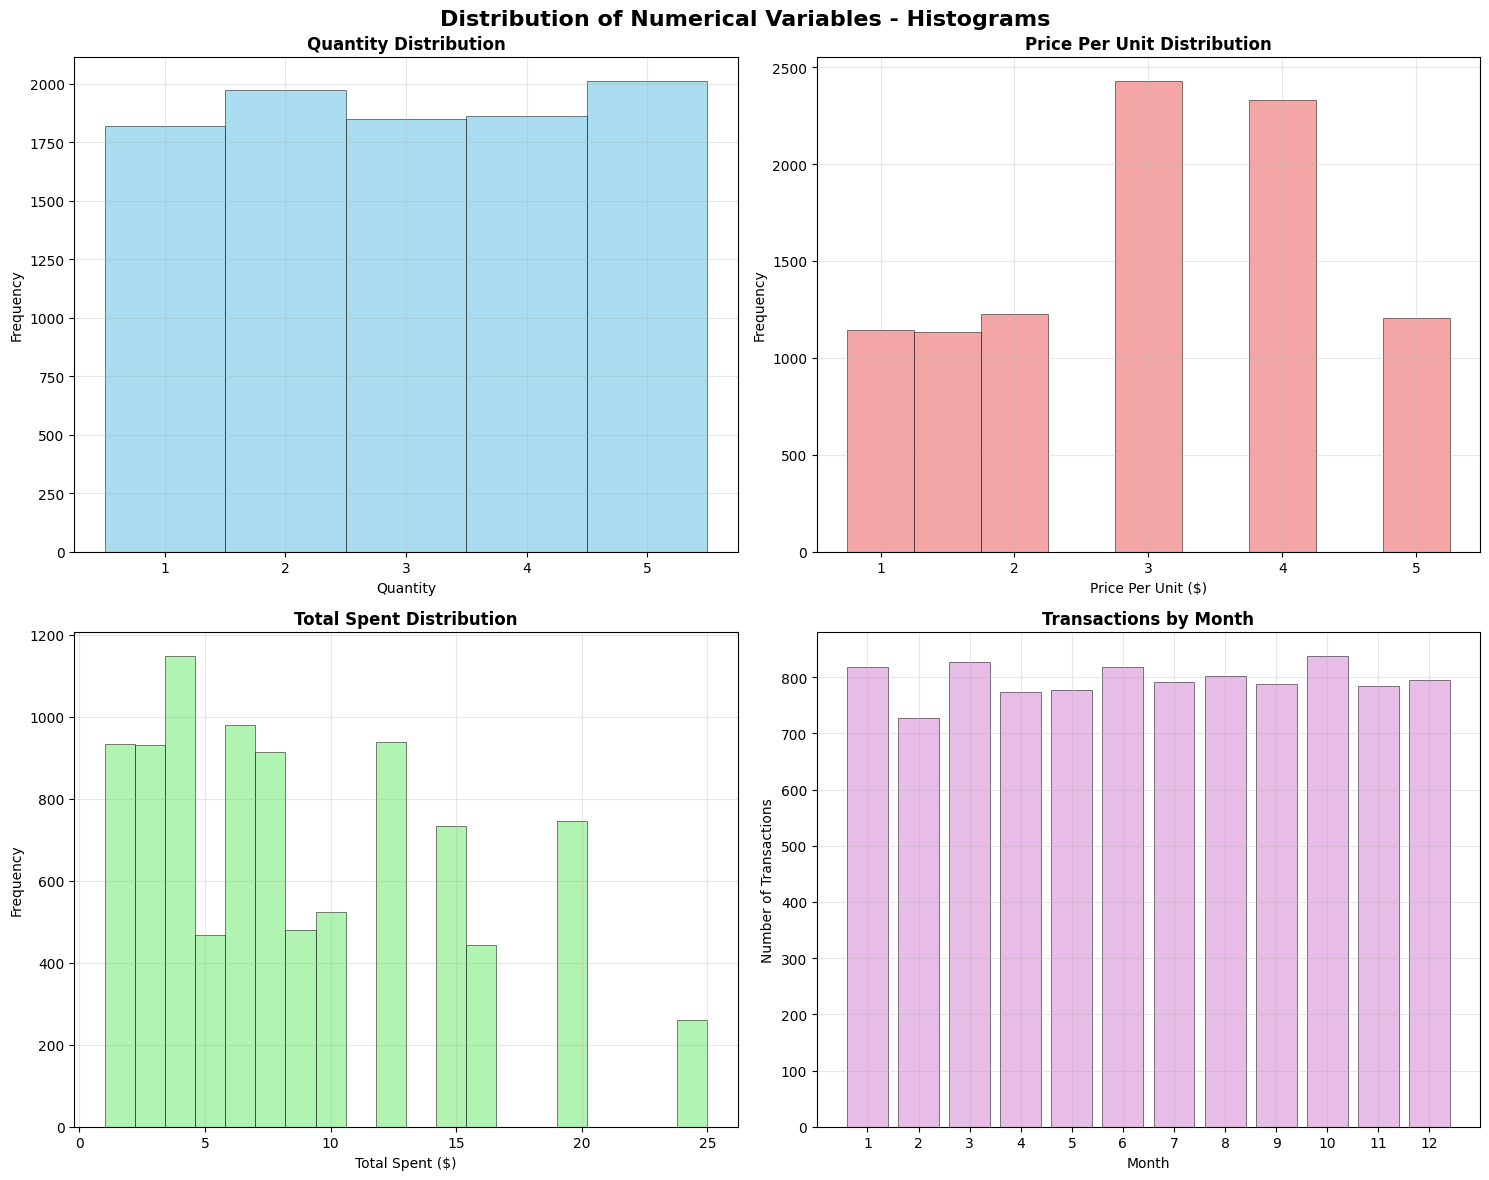

Distribution Statistics:
Quantity: Min=1.0, Max=5.0, Mode=5.0
Price Per Unit: Min=$1.00, Max=$5.00, Mean=$2.95
Total Spent: Min=$1.00, Max=$25.00, Mean=$8.92


In [10]:
# Create Histograms for Numerical Variables
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Numerical Variables - Histograms', fontsize=16, fontweight='bold')

# Define colors for each histogram
colors = ['skyblue', 'lightcoral', 'lightgreen', 'plum']

# Quantity Distribution
axes[0, 0].hist(df_clean['Quantity_clean'].dropna(), bins=np.arange(0.5, 6.5, 1), 
                alpha=0.7, color=colors[0], edgecolor='black', linewidth=0.5)
axes[0, 0].set_title('Quantity Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Quantity')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(range(1, 6))

# Price Per Unit Distribution
axes[0, 1].hist(df_clean['Price_Per_Unit_clean'].dropna(), bins=np.arange(0.75, 5.75, 0.5), 
                alpha=0.7, color=colors[1], edgecolor='black', linewidth=0.5)
axes[0, 1].set_title('Price Per Unit Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Price Per Unit ($)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)

# Total Spent Distribution
axes[1, 0].hist(df_clean['Total_Spent_clean'].dropna(), bins=20, 
                alpha=0.7, color=colors[2], edgecolor='black', linewidth=0.5)
axes[1, 0].set_title('Total Spent Distribution', fontweight='bold')
axes[1, 0].set_xlabel('Total Spent ($)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

# Transaction Date Distribution (by month)
df_clean['Month'] = df_clean['Transaction_Date_clean'].dt.month
month_counts = df_clean['Month'].value_counts().sort_index()
axes[1, 1].bar(month_counts.index, month_counts.values, alpha=0.7, color=colors[3], 
               edgecolor='black', linewidth=0.5)
axes[1, 1].set_title('Transactions by Month', fontweight='bold')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Number of Transactions')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks(range(1, 13))

plt.tight_layout()
plt.show()

# Print some statistics
print("Distribution Statistics:")
print(f"Quantity: Min={df_clean['Quantity_clean'].min()}, Max={df_clean['Quantity_clean'].max()}, Mode={df_clean['Quantity_clean'].mode().iloc[0]}")
print(f"Price Per Unit: Min=${df_clean['Price_Per_Unit_clean'].min():.2f}, Max=${df_clean['Price_Per_Unit_clean'].max():.2f}, Mean=${df_clean['Price_Per_Unit_clean'].mean():.2f}")
print(f"Total Spent: Min=${df_clean['Total_Spent_clean'].min():.2f}, Max=${df_clean['Total_Spent_clean'].max():.2f}, Mean=${df_clean['Total_Spent_clean'].mean():.2f}")

/var/folders/6p/l4q7z30n5sv_r0vgy0ll38fh0000gn/T/ipykernel_7068/1056388786.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box1 = axes[0, 0].boxplot(df_clean['Quantity_clean'].dropna(), patch_artist=True,
/var/folders/6p/l4q7z30n5sv_r0vgy0ll38fh0000gn/T/ipykernel_7068/1056388786.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box4 = axes[1, 1].boxplot(numerical_data, patch_artist=True, labels=labels)


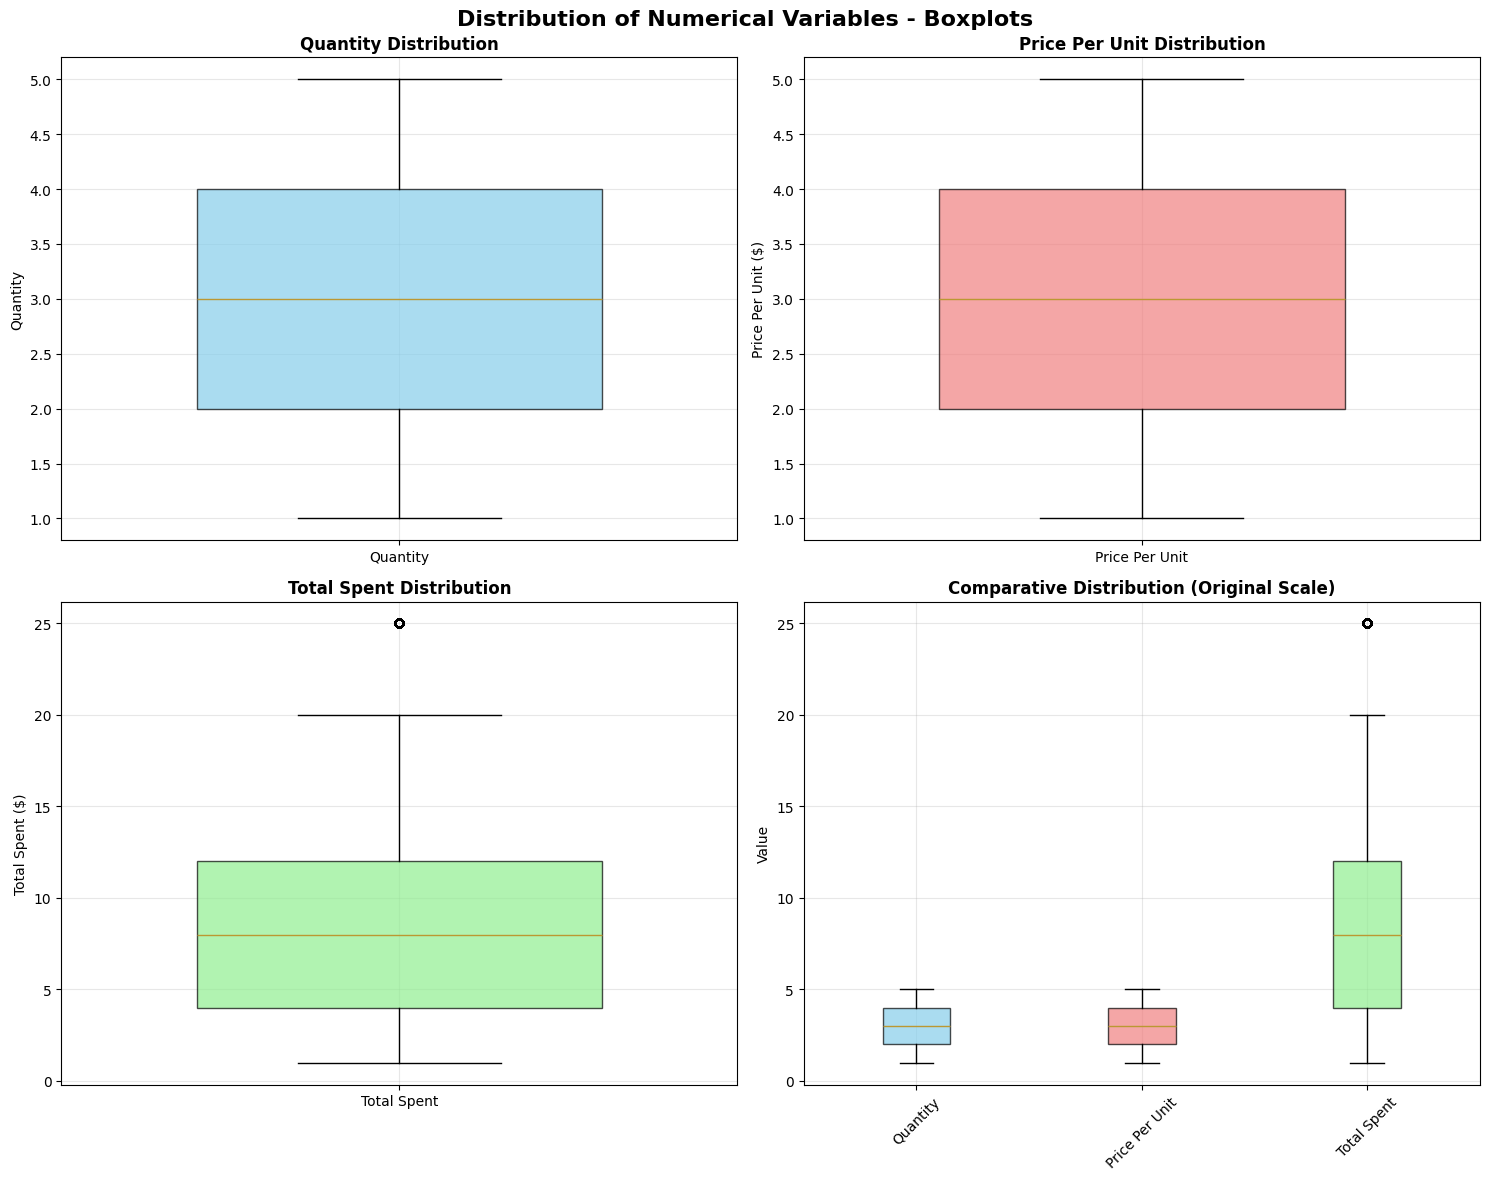

In [11]:
# Create Boxplots for Numerical Variables
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Numerical Variables - Boxplots', fontsize=16, fontweight='bold')

# Quantity Boxplot
box1 = axes[0, 0].boxplot(df_clean['Quantity_clean'].dropna(), patch_artist=True, 
                          labels=['Quantity'], widths=0.6)
box1['boxes'][0].set_facecolor('skyblue')
box1['boxes'][0].set_alpha(0.7)
axes[0, 0].set_title('Quantity Distribution', fontweight='bold')
axes[0, 0].set_ylabel('Quantity')
axes[0, 0].grid(True, alpha=0.3)

# Price Per Unit Boxplot
box2 = axes[0, 1].boxplot(df_clean['Price_Per_Unit_clean'].dropna(), patch_artist=True, 
                          tick_labels=['Price Per Unit'], widths=0.6)
box2['boxes'][0].set_facecolor('lightcoral')
box2['boxes'][0].set_alpha(0.7)
axes[0, 1].set_title('Price Per Unit Distribution', fontweight='bold')
axes[0, 1].set_ylabel('Price Per Unit ($)')
axes[0, 1].grid(True, alpha=0.3)

# Total Spent Boxplot
box3 = axes[1, 0].boxplot(df_clean['Total_Spent_clean'].dropna(), patch_artist=True, 
                          tick_labels=['Total Spent'], widths=0.6)
box3['boxes'][0].set_facecolor('lightgreen')
box3['boxes'][0].set_alpha(0.7)
axes[1, 0].set_title('Total Spent Distribution', fontweight='bold')
axes[1, 0].set_ylabel('Total Spent ($)')
axes[1, 0].grid(True, alpha=0.3)

# Comparative Boxplot of all three variables (normalized)
from sklearn.preprocessing import StandardScaler

# Prepare data for comparative boxplot
numerical_data = []
labels = []
for col, name in [('Quantity_clean', 'Quantity'), 
                  ('Price_Per_Unit_clean', 'Price Per Unit'), 
                  ('Total_Spent_clean', 'Total Spent')]:
    data = df_clean[col].dropna()
    numerical_data.append(data)
    labels.append(name)

box4 = axes[1, 1].boxplot(numerical_data, patch_artist=True, labels=labels)
colors = ['skyblue', 'lightcoral', 'lightgreen']
for patch, color in zip(box4['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

axes[1, 1].set_title('Comparative Distribution (Original Scale)', fontweight='bold')
axes[1, 1].set_ylabel('Value')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()